`CMPE-255. Fall 2023`

# Final Exam - Practical Exercise

# DATA and Assumptions

## Overview

In this exercise a dataset with 50 points on a 4th-dimensional space are available ("data" list below).

A One Class SVM approach is used for outlier detection. After applying this method with gamma=0.001 and nu=0.03, 2 outliers are found (See Section "One Class SVM" below).

This exercise has two main deliverables:
1. Evaluate the quality of the SVM approach.
2. Perform a different type of clustering, and evaluate the outliers.


## Assumptions and Constraints

1. Use the Manhattan distance for all required distance calculations.
2. Use Single Linkage (MIN Distance) for Cluster Proximity in Hierarchical Clustering.

In [1]:
# Dataset - Do not modify
data = [(8.31246862, 8.26376498, 7.7119213 , 7.61340555),
       (7.84803351, 7.67014203, 7.52829541, 7.8751585 ),
       (8.63077305, 8.00134023, 8.2398734 , 7.89930793),
       (7.58723494, 7.98534494, 7.68808952, 7.94958871),
       (7.99679236, 8.08367807, 8.24574176, 7.93338602),
       (8.78144606, 8.40471197, 8.16997211, 8.23995572),
       (8.01818978, 7.94683014, 8.42626575, 7.64601194),
       (7.94353005, 8.35453529, 8.13791368, 8.45018912),
       (7.89966642, 8.14651582, 7.90413093, 8.13622043),
       (8.09967043, 8.04758072, 8.23720067, 8.12169609),
       (7.89847381, 7.47174841, 7.8148721 , 7.8448051 ),
       (7.93546873, 7.96757954, 7.65550243, 8.12117138),
       (7.76494938, 7.66273229, 7.62880152, 7.92946831),
       (8.55069755, 7.85276707, 8.48615114, 8.36590105),
       (7.73461816, 8.02791795, 8.21751392, 8.20177507),
       (8.33430534, 8.0132603 , 7.61468539, 7.73502729),
       (7.85810349, 8.1557156 , 7.71861834, 8.15970622),
       (7.96482005, 8.01887423, 7.87425441, 8.25552272),
       (7.57661215, 8.14248669, 8.37964102, 8.09762316),
       (8.12611917, 8.30614664, 8.07079316, 7.82446596),
       (7.82318892, 8.14366431, 7.89682681, 7.74440482),
       (7.73271025, 8.30332668, 7.99357606, 8.15440504),
       (8.0764748 , 8.30264785, 7.77141352, 7.56578024),
       (7.71610753, 8.248134  , 8.63921549, 7.77063977),
       (7.95660681, 8.22092449, 7.96460135, 8.15730406),
       (7.7933422 , 8.08483882, 7.78423811, 7.61574223),
       (7.71315441, 8.42758725, 7.9728842 , 8.62488755),
       (7.88790663, 7.98258813, 7.94594233, 8.1501401 ),
       (7.78037793, 7.92645632, 7.99757064, 7.87505382),
       (7.44138648, 8.11086597, 7.96274706, 8.25869447),
       (8.52717441, 7.61761822, 7.74533006, 8.02344142),
       (8.22042746, 7.66392905, 8.19563278, 8.50203609),
       (7.56951233, 8.0800355 , 8.2631979 , 7.98905878),
       (8.37750854, 7.79524627, 7.72575062, 7.92786693),
       (7.86029428, 8.06105231, 7.9045097 , 7.74261278),
       (8.17028002, 7.50418305, 8.28171587, 8.36317931),
       (7.86503887, 7.50174304, 7.60929322, 7.98878975),
       (7.68783348, 7.68893236, 8.11649353, 7.82893267),
       (7.76474291, 8.26029633, 7.30945293, 8.64752994),
       (8.3014092 , 7.94895121, 8.14684743, 8.26477198),
       (8.12158246, 8.20320928, 7.90109725, 8.00088353),
       (8.27451029, 8.23677012, 7.86981706, 8.33528441),
       (7.79174486, 8.44069867, 8.0808897 , 7.67763929),
       (8.01022519, 7.61424468, 8.22174547, 8.26108845),
       (7.94352837, 7.89416739, 8.26694439, 8.29879931),
       (8.02702818, 8.39842157, 7.67873312, 7.19342127),
       (7.67867894, 7.87767402, 8.24803401, 8.47525768),
       (7.98816914, 8.05924006, 7.95843792, 7.83439812),
       (8.11968421, 7.5840706 , 8.09375885, 7.87974717),
       (8.02335017, 8.30763577, 8.46228586, 7.62792925)]
# End of dataset - Do not modify

# One Class SVM

The following calculations are a prerequisite to Deliverable I

In [2]:
# Only the following imports are allowed for Deliverable I
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
# Do not add any other library

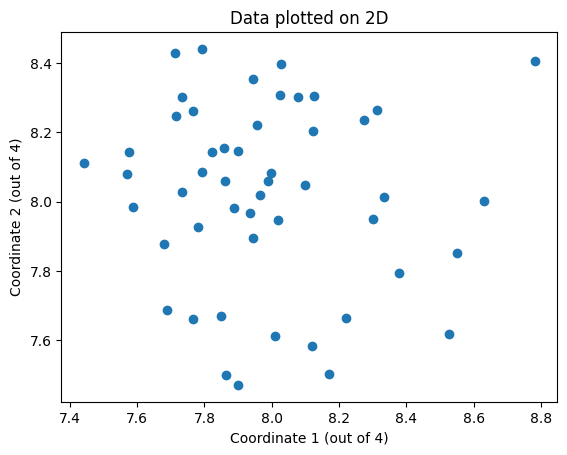

In [3]:
# Plot data.
# The points in the dataset are on a 4th-dimensional space
# Display only the first 2 dimensions
X = np.array(data)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Coordinate 1 (out of 4)')
plt.ylabel('Coordinate 2 (out of 4)')
plt.title('Data plotted on 2D')
plt.show()

In [4]:
# SVM Model and fitting
# Use the Radial Basis Function (RBF) as kernel
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
svm.fit(X)
pred = svm.predict(X)

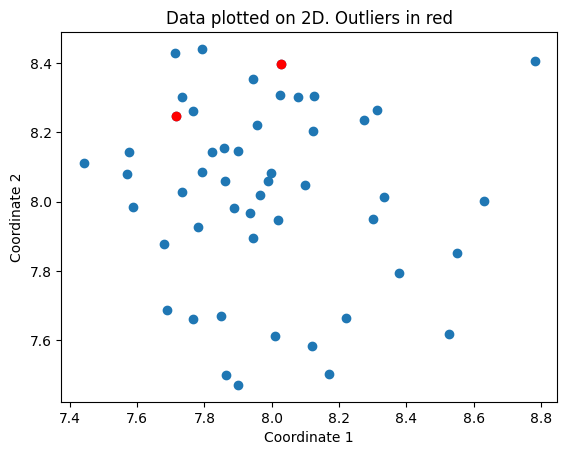

In [5]:
# Extract outliers
anom_index = np.where(pred==-1)
values = X[anom_index]

# Plot cluster (blue) and outliers (red)
plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.title('Data plotted on 2D. Outliers in red')
plt.show()

# Deliverable I - One Class SVM Outlier Detection

## I.1 - SSE (30 points)
Calculate and report the SSE for the calculated cluster above

---
SVM  is used for outlier detection. It creates a single class, i.e., it produces a single cluster. Apply below the SSE equation for the particular case of a single cluster


In [6]:
# Calculate SSE for the outliers (detected cluster) using One-Class SVM and Manhattan distance
outliers_center = np.mean(values, axis=0)  # Calculate the mean position of outliers
manhattan_distances = np.sum(np.abs(values - outliers_center), axis=1)  # Manhattan distances from the center
squared_distances_manhattan = np.sum(manhattan_distances ** 2)  # Summing the squared Manhattan distances to get SSE

print("SSE for the detected outliers using Manhattan distance:", squared_distances_manhattan)


SSE for the detected outliers using Manhattan distance: 1.9978187750423118


In [7]:
outliers = X[pred == -1]
print(outliers)

[[7.71610753 8.248134   8.63921549 7.77063977]
 [8.02702818 8.39842157 7.67873312 7.19342127]]



## I.2 - Updated SVM (30 points)
Update the parameters of the SVM model to tighten the constraints.
As a result, it should show 3 or more outliers, instead of 2.

---

To increase the number of outliers:

* Decrease gamma: This makes the boundary smoother and could potentially increase the number of outliers as the boundary becomes less flexible in fitting to the data.
* Increase nu: This allows for more flexibility in the margin, potentially leading to more data points being considered as outliers.

In [8]:
# Updated One Class SVM with tighter constraints
updated_svm = OneClassSVM(gamma=0.001, nu=0.05)  # Adjust nu as needed
updated_svm.fit(X)

# Identifying outliers
predictions = updated_svm.predict(data)
outliers = X[predictions == -1]
print(outliers)
print("Number of outliers:", len(outliers))

[[8.78144606 8.40471197 8.16997211 8.23995572]
 [8.55069755 7.85276707 8.48615114 8.36590105]
 [7.71610753 8.248134   8.63921549 7.77063977]
 [8.17028002 7.50418305 8.28171587 8.36317931]
 [8.02702818 8.39842157 7.67873312 7.19342127]]
Number of outliers: 5


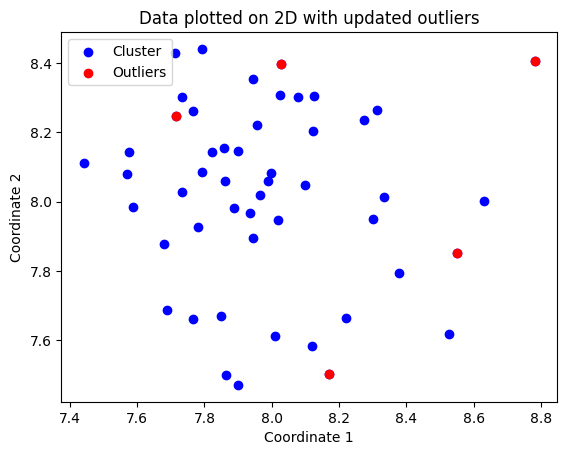

Number of outliers detected: 5


In [9]:

# Plotting clusters and outliers
plt.scatter(X[:, 0], X[:, 1], label='Cluster', color='blue')
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', color='red')
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.title('Data plotted on 2D with updated outliers')
plt.legend()
plt.show()

# Counting the number of detected outliers
num_outliers = len(outliers)
print("Number of outliers detected:", num_outliers)

# Deliverable II - Hierarchical Clustering

In [10]:
# Only the following imports are allowed for Deliverable II
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from itertools import combinations
# Do not add to this list

## II.1 Hierarchical Clustering Algorithm (80 points)

Create a hierarchical clustering algorithm that takes, as input, the data provided in this practical exercise, and creates, as output, a list in the appropriate format to use to create a dendrogram (See format for parameter 'Z' in https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

In [11]:
def hierarchical_clustering(X):
  n = len(X)
  Z = []
  cluster_ids = list(range(n))

  while len(cluster_ids) > 1:
      min_dist = float('inf')
      closest_clusters = ()

      for i in range(len(cluster_ids)):
          for j in range(i + 1, len(cluster_ids)):
              min_cluster_dist = float('inf')
              for idx_i in range(len(X)):
                  if idx_i == i or idx_i == j:
                      for idx_j in range(len(X)):
                          if idx_j != idx_i and idx_j != i and idx_j != j:
                              dist = np.sum(np.abs(X[idx_i] - X[idx_j]))  # Calculate Manhattan distance
                              min_cluster_dist = min(min_cluster_dist, dist)

              if min_cluster_dist < min_dist:
                  min_dist = min_cluster_dist
                  closest_clusters = (i, j)

      if len(closest_clusters) == 0:
          break

      i, j = closest_clusters
      Z.append([cluster_ids[i], cluster_ids[j], min_dist, 2])  # Adjust the length to 2 for merged clusters
      cluster_ids.append(n)  # Assign a new cluster ID
      n += 1
      del cluster_ids[j]
      del cluster_ids[i]

  Z = np.array(Z)
  return Z

# Applying the corrected function to the data
linkage_matrix = hierarchical_clustering(X)
linkage_matrix



array([[ 0.        , 20.        ,  0.12919229,  2.        ],
       [ 1.        , 22.        ,  0.12919229,  2.        ],
       [ 2.        , 24.        ,  0.12919229,  2.        ],
       [ 3.        , 26.        ,  0.12919229,  2.        ],
       [ 4.        , 28.        ,  0.12919229,  2.        ],
       [ 5.        , 30.        ,  0.12919229,  2.        ],
       [ 6.        , 32.        ,  0.12919229,  2.        ],
       [ 7.        , 34.        ,  0.12919229,  2.        ],
       [ 8.        , 36.        ,  0.12919229,  2.        ],
       [ 9.        , 38.        ,  0.12919229,  2.        ],
       [10.        , 40.        ,  0.12919229,  2.        ],
       [11.        , 42.        ,  0.12919229,  2.        ],
       [12.        , 44.        ,  0.12919229,  2.        ],
       [13.        , 46.        ,  0.12919229,  2.        ],
       [14.        , 48.        ,  0.12919229,  2.        ],
       [15.        , 50.        ,  0.12919229,  2.        ],
       [16.        , 52.

## II.2 Dendrogram (30 points)

Create a dendrogram with the hierarchical clustering generated above in II.1

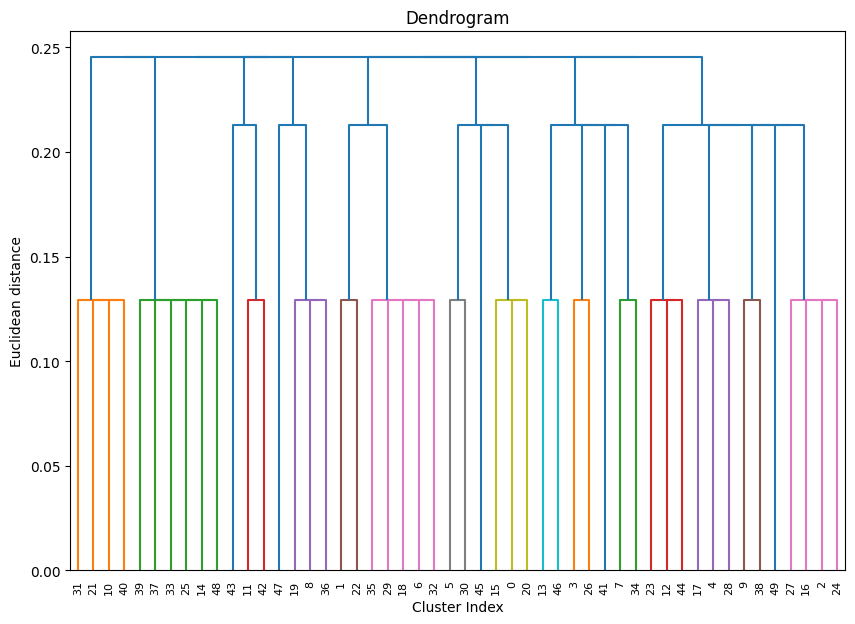

In [12]:
# Plotting the dendrogram with the corrected linkage matrix
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Cluster Index")
plt.ylabel("Euclidean distance")
plt.show()

## II.3 Top two outliers (30 points)

Print out the top two outliers, i.e., the number of the clusters farther away from the rest

Outliers Calculated Directly from Hierarchical

In [13]:
# Find the two clusters with the largest distances
max_distances = linkage_matrix[:, 2].argsort()[-2:]  # Indices of top two largest distances
top_outliers = linkage_matrix[max_distances][:, :2]  # Clusters corresponding to the top two outliers

print("Top two outlier clusters:", top_outliers)

Top two outlier clusters: [[92. 93.]
 [96. 97.]]


Outliers Calculated for hierarchical clustering using svm fit

In [14]:
updated_svm.fit(linkage_matrix)

# Identifying outliers
predictions = updated_svm.predict(linkage_matrix)
outliers = linkage_matrix[predictions == -1]

# Print the outliers
print("Outliers:\n", outliers)
print("Number of outliers:", len(outliers))



Outliers:
 [[17.         54.          0.12919229  2.        ]
 [18.         56.          0.12919229  2.        ]
 [19.         58.          0.12919229  2.        ]
 [59.         84.          0.21290311  2.        ]
 [63.         86.          0.21290311  2.        ]
 [75.         79.          0.24530979  2.        ]
 [96.         97.          0.24530979  2.        ]]
Number of outliers: 7


In [15]:
# Calculate the centroid (mean) of the inliers
inliers = linkage_matrix[predictions == 1]
centroid = np.mean(inliers, axis=0)

# Calculate the distance of each outlier from the centroid
distances = np.sum((outliers - centroid) ** 2, axis=1)

# Sort the outliers by their distance in descending order
sorted_indices = np.argsort(-distances)

# Get the top two outliers
top_two_outliers = outliers[sorted_indices[:2]]

print("Top Two Outliers:",top_two_outliers)

Top Two Outliers: [[96.         97.          0.24530979  2.        ]
 [75.         79.          0.24530979  2.        ]]
